<a href="https://colab.research.google.com/github/agmalaga2020/PolicySpace2_Spanish_data/blob/main/distribucion_urbana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### datos de brasil

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install polars

# inicio

In [ ]:
import polars as pl

# Ruta al archivo CSV en tu Google Drive
ruta = '/content/drive/Othercomputers/Mi PC (1)/GOOGLE DRIVE/DATA PESADA/df_final.csv'

# Leer el archivo CSV con Polars
df = pl.read_csv(ruta)


In [ ]:
df.head()


sexo,municipio_code,municipio_name,edad,periodo,total
str,i64,str,i64,i64,f64
"""Hombres""",44001,"""Ababuj""",0,2022,0.0
"""Hombres""",44001,"""Ababuj""",0,2021,0.0
"""Hombres""",44001,"""Ababuj""",0,2020,0.0
"""Hombres""",44001,"""Ababuj""",0,2019,0.0
"""Hombres""",44001,"""Ababuj""",0,2018,0.0


In [ ]:
# Obtener los valores únicos de la columna 'sexo'
unique_sexos = df['sexo'].unique()

# Imprimir los valores únicos
unique_sexos


sexo
str
"""Hombres"""
"""Mujeres"""


In [ ]:
# Mostrar filas con valores NaN en cualquier columna
df_nan = df.filter(pl.any_horizontal(pl.all().is_null()))
print(df_nan)

# Mostrar la cantidad de valores NaN por columna
print(df.null_count())


shape: (67_266, 6)
┌─────────┬────────────────┬─────────────────┬──────┬─────────┬───────┐
│ sexo    ┆ municipio_code ┆ municipio_name  ┆ edad ┆ periodo ┆ total │
│ ---     ┆ ---            ┆ ---             ┆ ---  ┆ ---     ┆ ---   │
│ str     ┆ i64            ┆ str             ┆ i64  ┆ i64     ┆ f64   │
╞═════════╪════════════════╪═════════════════╪══════╪═════════╪═══════╡
│ Hombres ┆ 10903          ┆ Alagón del Río  ┆ 0    ┆ 2009    ┆ null  │
│ Hombres ┆ 10903          ┆ Alagón del Río  ┆ 0    ┆ 2008    ┆ null  │
│ Hombres ┆ 10903          ┆ Alagón del Río  ┆ 0    ┆ 2007    ┆ null  │
│ Hombres ┆ 10903          ┆ Alagón del Río  ┆ 0    ┆ 2006    ┆ null  │
│ Hombres ┆ 10903          ┆ Alagón del Río  ┆ 0    ┆ 2005    ┆ null  │
│ …       ┆ …              ┆ …               ┆ …    ┆ …       ┆ …     │
│ Mujeres ┆ 48915          ┆ Ziortza-Bolibar ┆ 99   ┆ 2004    ┆ null  │
│ Mujeres ┆ 48915          ┆ Ziortza-Bolibar ┆ 99   ┆ 2003    ┆ null  │
│ Mujeres ┆ 48915          ┆ Ziortza-Bolibar 

### eliminamos valores nan

Mas info en cifras_poblacion_municipio.ipynb

https://colab.research.google.com/drive/1fO4DJHAPTSHTtYIAORPQXUWZQbET6ews#scrollTo=DvYM4HplYdI0

In [ ]:
df = df.with_columns([
    pl.col("total").fill_null(0.0)
])
print(df.null_count())

shape: (1, 6)
┌──────┬────────────────┬────────────────┬──────┬─────────┬───────┐
│ sexo ┆ municipio_code ┆ municipio_name ┆ edad ┆ periodo ┆ total │
│ ---  ┆ ---            ┆ ---            ┆ ---  ┆ ---     ┆ ---   │
│ u32  ┆ u32            ┆ u32            ┆ u32  ┆ u32     ┆ u32   │
╞══════╪════════════════╪════════════════╪══════╪═════════╪═══════╡
│ 0    ┆ 0              ┆ 0              ┆ 0    ┆ 0       ┆ 0     │
└──────┴────────────────┴────────────────┴──────┴─────────┴───────┘


In [ ]:
import polars as pl

# Verifica si la columna 'total' es de tipo float
if df['total'].dtype == pl.Float64:
    print("La columna 'total' es numérica.")
else:
    print("La columna 'total' no es numérica. Intentando convertirla...")
    try:
        df = df.with_columns(pl.col("total").cast(pl.Float64))
        print("Columna 'total' convertida a numérica.")
    except Exception as e:
        print(f"Error al convertir la columna 'total': {e}")


La columna 'total' es numérica.


In [ ]:
# Filtra el DataFrame para el año 2019
df_2019 = df.filter(pl.col("periodo") == 2019)

# Calcula la suma total de la columna 'total' para el año 2019
suma_total_2019 = df_2019["total"].sum()

# Imprime la suma total
print(f"La suma total para el año 2019 es: {suma_total_2019}")


La suma total para el año 2019 es: 470262080.0


In [ ]:

# Filtrar para municipio_code = 44001
df_filtered = df.filter(pl.col("municipio_code") == 44001)

# Mostrar los primeros registros del DataFrame filtrado
df_filtered

sexo,municipio_code,municipio_name,edad,periodo,total
str,i64,str,i64,i64,f64
"""Hombres""",44001,"""Ababuj""",0,2022,0.0
"""Hombres""",44001,"""Ababuj""",0,2021,0.0
"""Hombres""",44001,"""Ababuj""",0,2020,0.0
"""Hombres""",44001,"""Ababuj""",0,2019,0.0
"""Hombres""",44001,"""Ababuj""",0,2018,0.0
…,…,…,…,…,…
"""Mujeres""",44001,"""Ababuj""",100,2007,0.0
"""Mujeres""",44001,"""Ababuj""",100,2006,0.0
"""Mujeres""",44001,"""Ababuj""",100,2005,0.0


In [ ]:
# Filtrar para municipio_code = 44001 y año = 2022
df_filtered = df.filter((pl.col("municipio_code") == 44001) & (pl.col("periodo") == 2022))

# Mostrar los primeros registros del DataFrame filtrado
df_filtered

sexo,municipio_code,municipio_name,edad,periodo,total
str,i64,str,i64,i64,f64
"""Hombres""",44001,"""Ababuj""",0,2022,0.0
"""Hombres""",44001,"""Ababuj""",1,2022,0.0
"""Hombres""",44001,"""Ababuj""",2,2022,0.0
"""Hombres""",44001,"""Ababuj""",3,2022,0.0
"""Hombres""",44001,"""Ababuj""",4,2022,0.0
…,…,…,…,…,…
"""Mujeres""",44001,"""Ababuj""",96,2022,0.0
"""Mujeres""",44001,"""Ababuj""",97,2022,0.0
"""Mujeres""",44001,"""Ababuj""",98,2022,0.0


In [ ]:
totales = df_filtered['total'].sum()

# Imprimir la suma de totales
print(f"La suma de los totales para el municipio 44001 en 2022 es: {totales}")


La suma de los totales para el municipio 44001 en 2022 es: 720.0


### df totales_por_municipio_periodo

In [ ]:
# Crear una copia antes de modificar
df_copy = df.clone()

# Luego trabajar sobre la copia
df_copy = df_copy.drop("sexo")

# Agrupar por 'municipio_code' y 'periodo' y calcular la suma de 'total'
totales_por_municipio_periodo = df_copy.group_by(["municipio_code", "periodo"]).agg(
    pl.col("total").sum().alias("suma_total")
)

totales_por_municipio_periodo


municipio_code,periodo,suma_total
i64,i64,f64
27056,2006,16680.0
17227,2016,2020.0
17144,2017,2790.0
50259,2013,700.0
44150,2013,290.0
…,…,…
26103,2004,9460.0
26074,2015,1180.0
16247,2008,1040.0


##### control = 44001	2022	720.0


In [ ]:
# Filtrar por el mismo año y municipio del control (ejemplo: municipio_code = 44001 y periodo = 2022)
municipio_control = 44001
periodo_control = 2022

municipio_periodo_filtrado = totales_por_municipio_periodo.filter(
    (pl.col("municipio_code") == municipio_control) & (pl.col("periodo") == periodo_control)
)
municipio_periodo_filtrado

municipio_code,periodo,suma_total
i64,i64,f64
44001,2022,720.0


In [ ]:
# Filtrar por el año 2019
poblacion_2019 = totales_por_municipio_periodo.filter(pl.col("periodo") == 2019)

# Calcular la suma de la población total en 2019
total_poblacion_2019 = poblacion_2019["suma_total"].sum()

# Imprimir el resultado
print(f"La población total en 2019 es: {total_poblacion_2019}")

La población total en 2019 es: 470262080.0


In [ ]:
# Divide cada valor de la columna 'suma_total' entre 10
totales_por_municipio_periodo = totales_por_municipio_periodo.with_columns(
    (pl.col("suma_total") / 10).alias("suma_total_dividida")
)

# Muestra el DataFrame actualizado
totales_por_municipio_periodo


municipio_code,periodo,suma_total,suma_total_dividida
i64,i64,f64,f64
27056,2006,16680.0,1668.0
17227,2016,2020.0,202.0
17144,2017,2790.0,279.0
50259,2013,700.0,70.0
44150,2013,290.0,29.0
…,…,…,…
26103,2004,9460.0,946.0
26074,2015,1180.0,118.0
16247,2008,1040.0,104.0


In [ ]:
# Filtrar por el año 2019
poblacion_2019 = totales_por_municipio_periodo.filter(pl.col("periodo") == 2019)

# Calcular la suma de la población total en 2019
total_poblacion_2019 = poblacion_2019["suma_total_dividida"].sum()

# Imprimir el resultado
print(f"La población total en 2019 es: {total_poblacion_2019}")

La población total en 2019 es: 47026208.0


In [ ]:
# Agrupar por año y sumar los totales
totales_nacionales_por_año = totales_por_municipio_periodo.group_by("periodo").agg(
    pl.col("suma_total_dividida").sum().alias("total_nacional")
)

# Dividir la columna "total_nacional" entre 1 millón para expresarla en millones
totales_nacionales_por_año = totales_nacionales_por_año.with_columns(
    (pl.col("total_nacional") / 1_000_000).alias("total_nacional_millones")
)

# Eliminar la columna original "total_nacional"
totales_nacionales_por_año = totales_nacionales_por_año.drop("total_nacional")

# Mostrar el DataFrame resultante
print(totales_nacionales_por_año)


shape: (20, 2)
┌─────────┬─────────────────────────┐
│ periodo ┆ total_nacional_millones │
│ ---     ┆ ---                     │
│ i64     ┆ f64                     │
╞═════════╪═════════════════════════╡
│ 2022    ┆ 47.47542                │
│ 2012    ┆ 47.265321               │
│ 2014    ┆ 46.771341               │
│ 2019    ┆ 47.026208               │
│ 2005    ┆ 44.10853                │
│ …       ┆ …                       │
│ 2010    ┆ 47.021031               │
│ 2016    ┆ 46.557008               │
│ 2020    ┆ 47.450795               │
│ 2018    ┆ 46.72298                │
│ 2021    ┆ 47.385107               │
└─────────┴─────────────────────────┘


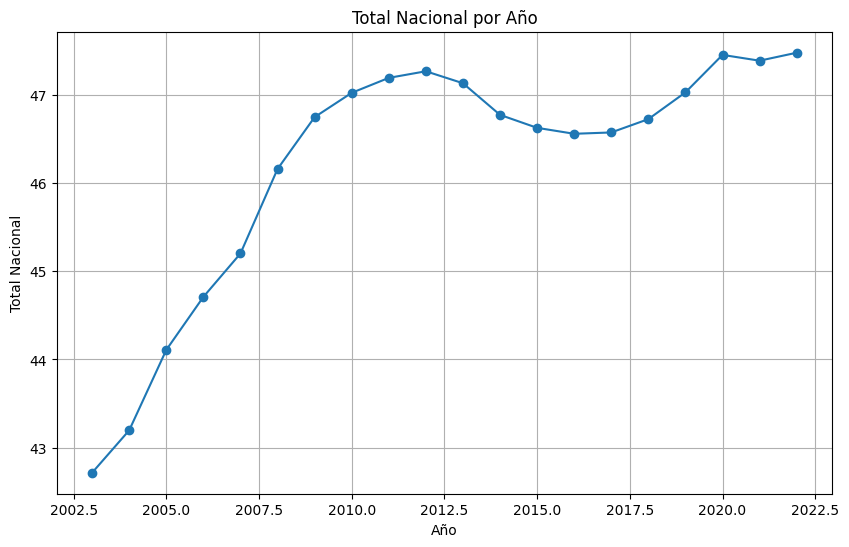

In [ ]:
# Ordenar el DataFrame por la columna 'periodo' de menor a mayor
totales_nacionales_por_año = totales_nacionales_por_año.sort("periodo")

# Importar la librería matplotlib para graficar
import matplotlib.pyplot as plt

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.plot(totales_nacionales_por_año["periodo"], totales_nacionales_por_año["total_nacional_millones"], marker='o')

# Agregar etiquetas y título al gráfico
plt.xlabel("Año")
plt.ylabel("Total Nacional")
plt.title("Total Nacional por Año")

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

# guardamos totales_por_municipio_periodo

Este dataset tiene los totales poblacionales por fecha de cada municipio de españa.

In [ ]:
# Guardar el DataFrame como un archivo CSV en la carpeta raíz de Google Drive
totales_por_municipio_periodo.write_csv("/content/totales_por_municipio_periodo.csv")

In [ ]:
totales_por_municipio_periodo



municipio_code,periodo,suma_total,suma_total_dividida
i64,i64,f64,f64
27056,2006,16680.0,1668.0
17227,2016,2020.0,202.0
17144,2017,2790.0,279.0
50259,2013,700.0,70.0
44150,2013,290.0,29.0
…,…,…,…
26103,2004,9460.0,946.0
26074,2015,1180.0,118.0
16247,2008,1040.0,104.0


## Merge de datos

#### Datos geográficos y toponimia de municipios

#### df_municipios (SUPERFICIE)

https://centrodedescargas.cnig.es/CentroDescargas/detalleArchivo?sec=9000004

In [ ]:
import pandas as pd

# Cargamos nuevamente el archivo con el separador correcto ";"
df_municipios = pd.read_csv("/content/MUNICIPIOS.csv", encoding='latin-1', sep=';')

# Mostramos las primeras filas para verificar la estructura del dataset
df_municipios.head()


,COD_INE,ID_REL,COD_GEO,COD_PROV,PROVINCIA,NOMBRE_ACTUAL,POBLACION_MUNI,SUPERFICIE,PERIMETRO,COD_INE_CAPITAL,CAPITAL,POBLACION_CAPITAL,HOJA_MTN25_ETRS89,LONGITUD_ETRS89,LATITUD_ETRS89,ORIGENCOOR,ALTITUD,ORIGENALTITUD
0,1001000000,1010014,1010,1,Araba/Álava,Alegría-Dulantzi,2975,"1994,5872",35069,1001000101,Alegría-Dulantzi,2860,0113-3,"-2,51243731","42,83981158",Mapa,568,MDT
1,1002000000,1010029,1020,1,Araba/Álava,Amurrio,10313,"9629,68",65381,1002000201,Amurrio,9238,0086-4,"-3,00007326","43,05427776",Mapa,219,MDT
2,1003000000,1010035,1030,1,Araba/Álava,Aramaio,1409,"7308,96",42097,1003000601,Ibarra,758,0087-4,"-2,56540037","43,05119653",Mapa,333,MDT
3,1004000000,1010040,1040,1,Araba/Álava,Artziniega,1832,"2728,73",22886,1004000101,Artziniega,1697,0086-1,"-3,12791718","43,12084358",Mapa,210,MDT
4,1006000000,1010066,1060,1,Araba/Álava,Armiñón,232,"1297,27",24707,1006000101,Armiñón,113,0137-4,"-2,87183475","42,72326199",Mapa,467,MDT


In [ ]:
# Convertimos la columna 'SUPERFICIE' de hectáreas a kilómetros cuadrados
# Primero reemplazamos comas por puntos y convertimos a numérico
df_municipios['SUPERFICIE'] = df_municipios['SUPERFICIE'].str.replace(',', '.').astype(float)

# Ahora convertimos a kilómetros cuadrados dividiendo por 100
df_municipios['SUPERFICIE_KM2'] = df_municipios['SUPERFICIE'] / 100

# Mostramos nuevamente las primeras filas para verificar la conversión
df_municipios[['COD_INE', 'NOMBRE_ACTUAL', 'SUPERFICIE', 'SUPERFICIE_KM2']].head()


,COD_INE,NOMBRE_ACTUAL,SUPERFICIE,SUPERFICIE_KM2
0,1001000000,Alegría-Dulantzi,1994.5872,19.945872
1,1002000000,Amurrio,9629.6800,96.296800
2,1003000000,Aramaio,7308.9600,73.089600
3,1004000000,Artziniega,2728.7300,27.287300
4,1006000000,Armiñón,1297.2700,12.972700


### 🧮 Siguientes pasos definidos:

- **Paso 2:** Integrar estos datos con el dataset original (`totales_por_municipio_periodo.csv`) usando el código de municipio.

- **Paso 3:** Calcular la densidad poblacional por municipio y año.

- **Paso 4:** Aplicar la regla de clasificación por densidad para estimar la proporción urbana.


#### df_totales_periodo

In [ ]:
df_totales_periodo = totales_por_municipio_periodo.to_pandas()
df_totales_periodo.head(1)

,municipio_code,periodo,suma_total,suma_total_dividida
0,27056,2006,16680.0,1668.0


#### df_equivalencias_municipio

In [ ]:

# Create a copy of the DataFrame with selected columns using pandas
df_equivalencias_polars = df[['municipio_code', 'municipio_name']]
df_equivalencias = df_equivalencias_polars.to_pandas()

df_equivalencias = df_equivalencias.drop_duplicates(subset=['municipio_code'])
df_equivalencias.head(2)

,municipio_code,municipio_name
0,44001,Ababuj
2020,40001,Abades


In [ ]:
df_equivalencias.to_csv('/content/df_equivalencias.csv', index=False)

#### df_totales_periodo_con_nombre

In [ ]:
# Asegurarnos que la columna 'municipio_code' tenga el mismo formato en ambos datasets
df_totales_periodo['municipio_code'] = df_totales_periodo['municipio_code'].astype(str)
df_equivalencias['municipio_code'] = df_equivalencias['municipio_code'].astype(str)

# Realizamos el merge para copiar el nombre del municipio desde df_equivalencias
df_totales_periodo_con_nombre = pd.merge(df_totales_periodo,
                                         df_equivalencias,
                                         on='municipio_code',
                                         how='left')

# Mostramos las primeras filas para verificar la correcta integración
df_totales_periodo_con_nombre.head()

,municipio_code,periodo,suma_total,suma_total_dividida,municipio_name
0,27056,2006,16680.0,1668.0,Rábade
1,17227,2016,2020.0,202.0,Vilamaniscle
2,17144,2017,2790.0,279.0,Regencós
3,50259,2013,700.0,70.0,Torrehermosa
4,44150,2013,290.0,29.0,Miravete de la Sierra


In [ ]:
# Verificar si todos los municipios de df_totales_periodo_con_nombre están presentes en df_municipios
municipios_faltantes = set(df_totales_periodo_con_nombre['municipio_name'].unique()) - set(df_municipios['NOMBRE_ACTUAL'].unique())

# Mostrar los municipios que no están en df_municipios
len(municipios_faltantes), list(municipios_faltantes)[:10]  # Mostramos los primeros 10 faltantes para verificar


(628,
 ['Bodón, El',
  'Pedroñeras, Las',
  'Picazo, El',
  'Bohodón, El',
  'Peraleja, La',
  'Cierva, La',
  'Bruc, El',
  'Mata de Morella, la',
  'Oso, El',
  'Bòrdes, Es'])

In [ ]:
# Extraer los primeros 5 dígitos del código COD_INE como identificador municipal compatible
df_municipios['municipio_code'] = df_municipios['COD_INE'].astype(str).str[:5]

# Verificar cuántos códigos de df_totales_periodo_con_nombre están presentes en df_municipios
codigos_faltantes = set(df_totales_periodo_con_nombre['municipio_code']) - set(df_municipios['municipio_code'])

# Mostrar cuántos códigos no tienen correspondencia
len(codigos_faltantes), list(codigos_faltantes)[:10]


(1548,
 ['8115',
  '9197',
  '8171',
  '4055',
  '6903',
  '5226',
  '8075',
  '3065',
  '1049',
  '4046'])

In [ ]:
# Nos aseguramos de que ambos códigos estén en formato de cadena para comparar correctamente
df_totales_periodo_con_nombre['municipio_code'] = df_totales_periodo_con_nombre['municipio_code'].astype(str)
df_municipios['municipio_code'] = df_municipios['COD_INE'].astype(str).str[:len(df_totales_periodo_con_nombre['municipio_code'].iloc[0])]

# Verificamos qué códigos de df_totales_periodo_con_nombre tienen coincidencias en df_municipios
coinciden = df_totales_periodo_con_nombre['municipio_code'].isin(df_municipios['municipio_code'])

# Cuántos códigos tienen correspondencia
coinciden.sum(), len(df_totales_periodo_con_nombre)

# Obtenemos las filas de df_totales_periodo_con_nombre que no tienen correspondencia con df_municipios
df_no_coinciden = df_totales_periodo_con_nombre[~coinciden]

# Mostramos cuántos municipios no coinciden y un ejemplo de ellos
df_no_coinciden.shape[0], df_no_coinciden[['municipio_code', 'municipio_name']].drop_duplicates().head(10)


(30960,
    municipio_code            municipio_name
 6            3123                       Sax
 19           6054        Fuente del Maestre
 21           3028                 Beniarrés
 38           7009                     Búger
 41           8155                 Palafolls
 48           9287            Quintanaortuño
 49           8043                 Canyelles
 54           2052                 Motilleja
 56           5206  San Esteban de los Patos
 59           4060   Lucainena de las Torres)

In [ ]:
# Eliminamos duplicados dejando una única fila por municipio_code
df_no_coinciden_unicos = df_no_coinciden.drop_duplicates(subset='municipio_code')

# Mostramos el número total y los primeros ejemplos
df_no_coinciden_unicos.shape[0], df_no_coinciden_unicos[['municipio_code', 'municipio_name']].head(10)


(1548,
    municipio_code            municipio_name
 6            3123                       Sax
 19           6054        Fuente del Maestre
 21           3028                 Beniarrés
 38           7009                     Búger
 41           8155                 Palafolls
 48           9287            Quintanaortuño
 49           8043                 Canyelles
 54           2052                 Motilleja
 56           5206  San Esteban de los Patos
 59           4060   Lucainena de las Torres)

In [ ]:
print(len(df_totales_periodo_con_nombre.municipio_code.unique()))
len(df_no_coinciden_unicos)

8135


1548

In [ ]:
# Paso 1: Traer SUPERFICIE_KM2 por código de municipio, asegurando unicidad
df_municipios_cod = df_municipios[['municipio_code', 'SUPERFICIE_KM2']].drop_duplicates(subset='municipio_code')

# Hacemos el merge por 'municipio_code'
df_totales_periodo_con_nombre_y_tamaño = pd.merge(
    df_totales_periodo_con_nombre,
    df_municipios_cod,
    on='municipio_code',
    how='left'
)

print(len(df_totales_periodo_con_nombre_y_tamaño))
print(len(df_totales_periodo_con_nombre))

# Mostramos las primeras filas para confirmar
df_totales_periodo_con_nombre_y_tamaño.head()


162700
162700


,municipio_code,periodo,suma_total,suma_total_dividida,municipio_name,SUPERFICIE_KM2
0,27056,2006,16680.0,1668.0,Rábade,5.171101
1,17227,2016,2020.0,202.0,Vilamaniscle,5.329975
2,17144,2017,2790.0,279.0,Regencós,6.285300
3,50259,2013,700.0,70.0,Torrehermosa,21.132872
4,44150,2013,290.0,29.0,Miravete de la Sierra,36.514943


In [ ]:
# Filtrar filas con SUPERFICIE_KM2 nula
faltantes_superficie = df_totales_periodo_con_nombre_y_tamaño[df_totales_periodo_con_nombre_y_tamaño['SUPERFICIE_KM2'].isna()]

# Contar municipios únicos que no tienen superficie
faltantes_superficie_unicos = faltantes_superficie[['municipio_code', 'municipio_name']].drop_duplicates()

# Mostrar el total y algunos ejemplos
faltantes_superficie_unicos.shape[0], faltantes_superficie_unicos.head(10)


(1548,
    municipio_code            municipio_name
 6            3123                       Sax
 19           6054        Fuente del Maestre
 21           3028                 Beniarrés
 38           7009                     Búger
 41           8155                 Palafolls
 48           9287            Quintanaortuño
 49           8043                 Canyelles
 54           2052                 Motilleja
 56           5206  San Esteban de los Patos
 59           4060   Lucainena de las Torres)

In [ ]:
# Preparamos un subset del df_municipios con nombre y superficie sin duplicados
df_municipios_nombres = df_municipios[['NOMBRE_ACTUAL', 'SUPERFICIE_KM2']].drop_duplicates(subset='NOMBRE_ACTUAL')

# Hacemos el merge solo para los municipios con superficie faltante, usando el nombre
df_nombre_merge = pd.merge(
    faltantes_superficie_unicos,
    df_municipios_nombres,
    left_on='municipio_name',
    right_on='NOMBRE_ACTUAL',
    how='left'
).drop(columns=['NOMBRE_ACTUAL'])

# Usamos update para introducir esos valores donde falte
df_totales_periodo_con_nombre_y_tamaño.set_index(['municipio_code', 'municipio_name'], inplace=True)
df_nombre_merge.set_index(['municipio_code', 'municipio_name'], inplace=True)

# Solo actualizamos las filas que tenían NaN en superficie
df_totales_periodo_con_nombre_y_tamaño.update(df_nombre_merge)

# Restauramos el índice
df_totales_periodo_con_nombre_y_tamaño.reset_index(inplace=True)
df_totales_periodo_con_nombre.reset_index(drop=True, inplace=True)

# Comprobamos que no hay filas duplicadas o pérdidas
print(len(df_totales_periodo_con_nombre_y_tamaño))
print(len(df_totales_periodo_con_nombre))

# Filtrar filas con SUPERFICIE_KM2 nula
faltantes_superficie = df_totales_periodo_con_nombre_y_tamaño[df_totales_periodo_con_nombre_y_tamaño['SUPERFICIE_KM2'].isna()]

# Contar municipios únicos que no tienen superficie
faltantes_superficie_unicos = faltantes_superficie[['municipio_code', 'municipio_name']].drop_duplicates()

# Mostrar el total y algunos ejemplos
faltantes_superficie_unicos.shape[0], faltantes_superficie_unicos.head(10)



162700
162700


(128,
     municipio_code           municipio_name
 103           6037             Codosera, La
 278           6039             Coronada, La
 315           2066              Recueja, La
 354           6090     Nava de Santiago, La
 428           6061                 Haba, La
 458           8169    Prat de Llobregat, El
 461           8117  Masies de Voltregà, Les
 552           9030             Ausines, Los
 668           4902                Ejido, El
 790           8166      Pobla de Lillet, La)

In [ ]:
# Instalamos rapidfuzz si no está disponible (normalmente Colab/Jupyter puede requerirlo)
try:
    from rapidfuzz import process
except ImportError:
    !pip install rapidfuzz
    from rapidfuzz import process



In [ ]:
faltantes_superficie_unicos


,municipio_code,municipio_name
103,6037,"Codosera, La"
278,6039,"Coronada, La"
315,2066,"Recueja, La"
354,6090,"Nava de Santiago, La"
428,6061,"Haba, La"
...,...,...
25966,3051,"Campo de Mirra/Camp de Mirra, el"
26377,8094,"Granada, La"
32802,36011,Cerdedo
33031,3082,Jávea/Xàbia


In [ ]:
# Lista de nombres disponibles en el dataset de municipios oficiales
nombres_municipios_oficiales = df_municipios['NOMBRE_ACTUAL'].unique()

# Creamos un diccionario para almacenar los mejores matches
mejores_matches = {}

# Recorremos cada municipio que falta y buscamos su mejor coincidencia
for nombre_faltante in faltantes_superficie_unicos['municipio_name']:
    mejor_match = process.extractOne(nombre_faltante, nombres_municipios_oficiales, score_cutoff=90)
    if mejor_match:
        mejores_matches[nombre_faltante] = mejor_match

# Mostramos los primeros 10 matches encontrados con alta similitud
list(mejores_matches.items())[:128]


[('Codosera, La', ('La Codosera', 90.86956521739131, 666)),
 ('Coronada, La', ('La Coronada', 90.86956521739131, 668)),
 ('Recueja, La', ('La Recueja', 90.47619047619048, 116)),
 ('Nava de Santiago, La', ('La Nava de Santiago', 92.56410256410255, 719)),
 ('Prat de Llobregat, El', ('El Prat de Llobregat', 92.68292682926828, 1030)),
 ('Masies de Voltregà, Les',
  ('Les Masies de Voltregà', 92.88888888888887, 978)),
 ('Ausines, Los', ('Los Ausines', 90.86956521739131, 1196)),
 ('Pobla de Lillet, La', ('La Pobla de Lillet', 92.43243243243244, 1027)),
 ('Garrovilla, La', ('La Garrovilla', 91.48148148148148, 687)),
 ('Barraco, El', ('El Barraco', 90.47619047619048, 397)),
 ('Castell de Guadalest, el',
  ('el Castell de Guadalest', 92.97872340425532, 212)),
 ('Carrascalejo, El', ('El Carrascalejo', 91.93548387096774, 661)),
 ('Sequera de Haza, La', ('La Sequera de Haza', 92.43243243243244, 1448)),
 ('Llagosta, La', ('La Llagosta', 90.86956521739131, 966)),
 ('Palma de Cervelló, La', ('La Palm

In [ ]:
# Extraer solo el nombre corregido del resultado de rapidfuzz
matches_procesados = {
    nombre_original: resultado[0]
    for nombre_original, resultado in mejores_matches.items()
}

# Crear un DataFrame a partir de los matches con los nombres corregidos
df_matches = pd.DataFrame.from_dict(matches_procesados, orient='index', columns=['NOMBRE_CORREGIDO'])
df_matches.reset_index(inplace=True)
df_matches.rename(columns={'index': 'municipio_name'}, inplace=True)

# Traer SUPERFICIE_KM2 desde df_municipios usando el nombre corregido
df_matches = pd.merge(
    df_matches,
    df_municipios[['NOMBRE_ACTUAL', 'SUPERFICIE_KM2']],
    left_on='NOMBRE_CORREGIDO',
    right_on='NOMBRE_ACTUAL',
    how='left'
).drop(columns=['NOMBRE_ACTUAL'])

# Volvemos a asociarlo con su municipio_code desde los faltantes
df_matches = pd.merge(
    faltantes_superficie_unicos,
    df_matches,
    on='municipio_name',
    how='inner'
)[['municipio_code', 'municipio_name', 'SUPERFICIE_KM2']]

# Establecer el índice para hacer update en el DataFrame principal
df_totales_periodo_con_nombre_y_tamaño.set_index(['municipio_code', 'municipio_name'], inplace=True)
df_matches.set_index(['municipio_code', 'municipio_name'], inplace=True)

# Actualizamos valores
df_totales_periodo_con_nombre_y_tamaño.update(df_matches)

# Restauramos el índice
df_totales_periodo_con_nombre_y_tamaño.reset_index(inplace=True)

# Verificamos cuántos municipios únicos siguen sin SUPERFICIE_KM2
faltantes_post_match = df_totales_periodo_con_nombre_y_tamaño[df_totales_periodo_con_nombre_y_tamaño['SUPERFICIE_KM2'].isna()]
faltantes_post_match_unicos = faltantes_post_match[['municipio_code', 'municipio_name']].drop_duplicates()

faltantes_post_match_unicos.shape[0], faltantes_post_match_unicos.head(10)


(37,
      municipio_code municipio_name
 428            6061       Haba, La
 668            4902      Ejido, El
 821            8025       Bruc, El
 998            3094      Nucia, la
 1044           8254   Esquirol, L'
 1264           5129      Mirón, El
 1348           5247      Torre, La
 2193          15063   Oza dos Ríos
 2309           2069       Roda, La
 2327           8026      Brull, El)

In [ ]:
from rapidfuzz import process

# Cargamos los nombres oficiales únicos del DataFrame de municipios
nombres_municipios_oficiales = df_municipios['NOMBRE_ACTUAL'].unique()

# Creamos un nuevo diccionario para guardar coincidencias >= 85%
mejores_matches_85 = {}

# Iteramos sobre los municipios que siguen faltando
for nombre_faltante in faltantes_post_match_unicos['municipio_name']:
    resultado = process.extractOne(nombre_faltante, nombres_municipios_oficiales, score_cutoff=70)
    if resultado:
        mejores_matches_85[nombre_faltante] = resultado[0]  # Solo guardamos el nombre más parecido


In [ ]:
print(len(mejores_matches_85))
mejores_matches_85

37


{'Haba, La': 'La Haba',
 'Ejido, El': 'El Ejido',
 'Bruc, El': 'El Bruc',
 'Nucia, la': 'la Nucia',
 "Esquirol, L'": "L'Esquirol",
 'Mirón, El': 'El Mirón',
 'Torre, La': 'La Torre',
 'Oza dos Ríos': 'Oiz',
 'Roda, La': 'La Roda',
 'Brull, El': 'El Brull',
 "Atzúbia, l'": "l'Atzúbia",
 'Alicante/Alacant': 'Alacant/Alicante',
 'Elche/Elx': 'Ilche',
 'Beniardá': 'Beniardà',
 "Estany, L'": 'Estada',
 "Ametlla del Vallès, L'": "L'Ametlla del Vallès",
 'Zarza, La': 'La Zarza',
 'Horra, La': 'La Horra',
 "Hospitalet de Llobregat, L'": "L'Hospitalet de Llobregat",
 "Alqueria d'Asnar, l'": "l'Alqueria d'Asnar",
 'Monóvar/Monòver': 'Moneva',
 'Castell, Es': 'es Castell',
 'Jijona/Xixona': 'Tona',
 'Torremanzanas/Torre de les Maçanes, la': 'la Torre de les Maçanes/Torremanzanas',
 "Alfàs del Pi, l'": 'Montealegre del Castillo',
 'Salines, Ses': 'ses Salines',
 'Pobla, Sa': 'Sa Pobla',
 'Oso, El': 'El Oso',
 'Parra, La': 'La Parra',
 "Espunyola, L'": 'Bunyola',
 'Benitachell/Poble Nou de Benitatx

### ❌ Coincidencias que **NO son seguras o parecen incorrectas**:

Estas tienen coincidencias con municipios que **no tienen relación real**:

- `'Monóvar/Monòver'` → `'Moneva'` ❌ (*completamente diferente*)
- `'Oza dos Ríos'` → `'Oiz'` ❌ (*provincias y significado diferentes*)
- `'Elche/Elx'` → `'Ilche'` ❌ (*error por similitud parcial*)
- `'Jávea/Xàbia'` → `'Aia'` ❌
- `"Alfàs del Pi, l'"` → `'Montealegre del Castillo'` ❌
- `'Benitachell/Poble Nou de Benitatxell, el'` → `'Baños de Ebro/Mañueta'` ❌
- `'Estany, L'` → `'Estada'` ❌
- `'Jijona/Xixona'` → `'Tona'` ❌
- `"Espunyola, L'"` → `'Bunyola'` ❌

---

### 🧠 Conclusión

De los 37 municipios:

- ✅ **28 parecen coincidencias válidas.**
- ❌ **9 deberían ser descartadas o revisadas manualmente.**

---


In [ ]:
# Lista de nombres mal emparejados que debemos eliminar de mejores_matches_85
municipios_a_eliminar = [
    'Monóvar/Monòver',
    'Oza dos Ríos',
    'Elche/Elx',
    'Jávea/Xàbia',
    "Alfàs del Pi, l'",
    'Benitachell/Poble Nou de Benitatxell, el',
    "Estany, L'",
    'Jijona/Xixona',
    "Espunyola, L'"
]

# Eliminamos estas entradas del diccionario de matches
for municipio in municipios_a_eliminar:
    if municipio in mejores_matches_85:
        del mejores_matches_85[municipio]

# Mostramos cuántos matches quedan después de filtrar
len(mejores_matches_85)


28

In [ ]:
pre_distribucion_urbana = df_totales_periodo_con_nombre_y_tamaño.copy()


In [ ]:
# Iteramos sobre los mejores matches y actualizamos la superficie
for nombre_original, nombre_corregido in mejores_matches_85.items():
    # Buscamos la superficie del nombre corregido en df_municipios
    superficie = df_municipios[df_municipios['NOMBRE_ACTUAL'] == nombre_corregido]['SUPERFICIE_KM2'].iloc[0]

    # Actualizamos la superficie en pre_distribucion_urbana para el nombre original
    pre_distribucion_urbana.loc[pre_distribucion_urbana['municipio_name'] == nombre_original, 'SUPERFICIE_KM2'] = superficie


In [ ]:
municipios_con_nan = pre_distribucion_urbana[pre_distribucion_urbana['SUPERFICIE_KM2'].isna()]['municipio_name'].unique()
municipios_con_nan


array(['Oza dos Ríos', 'Elche/Elx', "Estany, L'", 'Monóvar/Monòver',
       'Jijona/Xixona', "Alfàs del Pi, l'", "Espunyola, L'",
       'Benitachell/Poble Nou de Benitatxell, el', 'Jávea/Xàbia'],
      dtype=object)

In [ ]:
municipios_a_eliminar_set = set(municipios_a_eliminar)
municipios_con_nan_set = set(municipios_con_nan)

# Comprobar si los conjuntos son iguales
if municipios_a_eliminar_set == municipios_con_nan_set:
    print("municipios_a_eliminar y municipios_con_nan son iguales.")
else:
    print("municipios_a_eliminar y municipios_con_nan son diferentes.")

    # Mostrar las diferencias entre los conjuntos para ver qué elementos son únicos
    print("Elementos en municipios_a_eliminar pero no en municipios_con_nan:", municipios_a_eliminar_set - municipios_con_nan_set)
    print("Elementos en municipios_con_nan pero no en municipios_a_eliminar:", municipios_con_nan_set - municipios_a_eliminar_set)


municipios_a_eliminar y municipios_con_nan son iguales.


In [ ]:
# Creamos una copia del DataFrame para no modificar el original
distribucion_urbana = pre_distribucion_urbana.copy()

# Iteramos sobre los municipios con valores NaN en 'SUPERFICIE_KM2'
for municipio in municipios_con_nan:
  # Imprimimos el nombre del municipio que vamos a eliminar
  print(f"Eliminando filas para el municipio: {municipio}")

  # Eliminamos las filas correspondientes al municipio actual
  distribucion_urbana = distribucion_urbana[distribucion_urbana['municipio_name'] != municipio]


Eliminando filas para el municipio: Oza dos Ríos
Eliminando filas para el municipio: Elche/Elx
Eliminando filas para el municipio: Estany, L'
Eliminando filas para el municipio: Monóvar/Monòver
Eliminando filas para el municipio: Jijona/Xixona
Eliminando filas para el municipio: Alfàs del Pi, l'
Eliminando filas para el municipio: Espunyola, L'
Eliminando filas para el municipio: Benitachell/Poble Nou de Benitatxell, el
Eliminando filas para el municipio: Jávea/Xàbia


In [ ]:
# Descargamos dataset
distribucion_urbana.to_csv('distribucion_urbana.csv', index=False)


In [ ]:
# prompt: ver nan en distribucion_urbana mostrar total

# Verificar valores NaN en la columna 'SUPERFICIE_KM2' y mostrar el total
nan_count = distribucion_urbana['SUPERFICIE_KM2'].isna().sum()
print(f"Total de valores NaN en 'SUPERFICIE_KM2': {nan_count}")

# Mostrar el total de la columna 'suma_total'
suma_total = distribucion_urbana['suma_total'].sum()
print(f"Total de la columna 'suma_total': {suma_total}")


Total de valores NaN en 'SUPERFICIE_KM2': 0
Total de la columna 'suma_total': 9179723140.0


# Calculos de densidad ajustados con datos de nomenclator

https://www.ine.es/dyngs/INEbase/operacion.htm?c=Estadistica_C&cid=1254736177010&menu=resultados&idp=1254735572981

---

## 🧭 ¿Qué estamos haciendo?

Estamos desarrollando un **modelo proxy para estimar la proporción de población urbana** en cada municipio español. Este modelo se integrará posteriormente en una plataforma tipo **PolicySpace** para simular dinámicas urbanas, residenciales y socioeconómicas en territorios a nivel municipal.

---

## 🎯 Objetivo del modelo

El modelo busca:

- Estimar de forma razonable **qué parte de la población vive en núcleos urbanos** dentro de cada municipio.
- Hacerlo **solo con datos disponibles de forma masiva** (población total, superficie, etc.).
- Evitar depender de datos micro como los núcleos del Nomenclátor para cada año y municipio.

---

## 📦 Datos disponibles

Ya hemos procesado:

- **df_urbana**: población total (`suma_total_dividida`), superficie (`SUPERFICIE_KM2`) y código de municipio.
- **df_pivot**: proporción urbana real del INE (`proporcion_urbana_real`) para cada municipio en 2016.
- Hemos detectado que el INE considera “núcleo urbano” muchos asentamientos dispersos → el dato real puede estar **sesgado al alza**.

---

## 🧪 Lecciones aprendidas de la validación

1. La estimación por **densidad pura** penaliza bien áreas rurales, pero subestima **pequeños municipios compactos**.
2. El valor `proporcion_urbana_real` del INE incluye municipios **con densidad bajísima pero 100% en núcleos**, lo cual **no representa real urbanismo funcional**.
3. Queremos evitar que el modelo **infle artificialmente la urbanización** solo porque el INE marca "todo en núcleo".

---

## 🛠 Plan para el nuevo modelo

Diseñar una función de estimación basada en reglas, usando:

### 📌 Variables base:
- `densidad_poblacion` = población / superficie
- `suma_total_dividida` = población total real
- `proporcion_urbana_real` = sólo para validación

### 📐 Reglas clave del nuevo modelo:

| Condición | Estimación |
|-----------|------------|
| `densidad > 300`         | 0.9        |
| `150 < densidad <= 300`  | 0.75       |
| `50 < densidad <= 150`   | 0.5        |
| `densidad <= 50` y población < 150 y INE > 0.8 | 0.75 |
| `densidad <= 50` y población < 150             | 0.5  |
| `proporcion_urbana_real > 0.95` y densidad < 30 y población < 1000 | 0.9 |
| **else**                 | 0.2        |

---

## ✅ Ventajas del modelo

- Simple de implementar
- Sensible a densidad **y** concentración poblacional
- Compatible con simulaciones en entornos como PolicySpace
- Ajustado y validado contra datos oficiales del INE

---


In [144]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df_pivot = pd.read_csv('/content/proporcion_urbana_real_2016_NOMENNCLATOR.csv')

In [173]:
# Partimos desde el dataset original
df_urbana = distribucion_urbana.copy()

# Aseguramos formatos compatibles para el merge
df_urbana['municipio_code'] = df_urbana['municipio_code'].astype(str)
df_pivot['municipio_code'] = df_pivot['municipio_code'].astype(str)

# Calculamos densidad correctamente
df_urbana['densidad_poblacion'] = df_urbana['suma_total_dividida'] / df_urbana['SUPERFICIE_KM2']

# Unimos proporción urbana real para validación
df_urbana = pd.merge(
    df_urbana,
    df_pivot[['municipio_code', 'proporcion_urbana_real']],
    on='municipio_code',
    how='left'
)

# Ajustamos la función para que los municipios pequeños concentrados no pasen de 0.6
def estimar_proporcion_definitiva_final_moderada(row):
    densidad = row['densidad_poblacion']
    poblacion = row['suma_total_dividida']
    ine = row['proporcion_urbana_real']

    # 1. Altísima densidad → zona urbana consolidada
    if densidad > 300:
        return 0.9

    # 2. Densidad alta → zona semiurbana consolidada
    elif densidad > 150:
        return 0.75

    # 3. Densidad media → zona de transición rural-urbana
    elif densidad > 45:
        return 0.5

    # 4. INE dice 100% urbano y densidad > 20 → asumimos semiurbano funcional
    elif pd.notnull(ine) and ine == 1.0 and densidad > 20:
        return 0.6  # bajamos de 0.75 a 0.6

    # 5. INE 100% urbano, densidad baja y población < 6000 → semiurbano agrupado
    elif pd.notnull(ine) and ine == 1.0 and densidad < 20 and poblacion < 6000:
        return 0.6  # bajamos de 0.75 a 0.6

    # 6. INE > 95% urbano, baja densidad y municipio muy pequeño
    elif pd.notnull(ine) and ine > 0.95 and densidad < 30 and poblacion < 1000:
        return 0.6  # bajamos de 0.9 a 0.6

    # 7. Pueblo muy pequeño con núcleo claro
    elif poblacion < 150 and densidad < 15:
        return 0.6 if pd.notnull(ine) and ine > 0.8 else 0.5

    # 8. Todos los demás → rurales
    else:
        return 0.2

# Aplicamos la función ajustada
df_urbana['proporcion_urbana_estimada'] = df_urbana.apply(estimar_proporcion_definitiva_final_moderada, axis=1)
df_urbana['error_absoluto'] = abs(df_urbana['proporcion_urbana_estimada'] - df_urbana['proporcion_urbana_real'])

# Verificamos cómo quedan los municipios que antes eran casos límite
df_urbana.sort_values(by='error_absoluto', ascending=False)[[
    'municipio_code', 'municipio_name', 'suma_total_dividida', 'SUPERFICIE_KM2',
    'densidad_poblacion', 'proporcion_urbana_real',
    'proporcion_urbana_estimada', 'error_absoluto'
]].head(10)




,municipio_code,municipio_name,suma_total_dividida,SUPERFICIE_KM2,densidad_poblacion,proporcion_urbana_real,proporcion_urbana_estimada,error_absoluto
148880,50095,Ejea de los Caballeros,16870.0,613.5086,27.497577,0.999947,0.2,0.799947
39748,50095,Ejea de los Caballeros,17036.0,613.5086,27.768152,0.999947,0.2,0.799947
118809,50095,Ejea de los Caballeros,17344.0,613.5086,28.270182,0.999947,0.2,0.799947
58482,50095,Ejea de los Caballeros,17178.0,613.5086,27.999608,0.999947,0.2,0.799947
40363,50095,Ejea de los Caballeros,16598.0,613.5086,27.054225,0.999947,0.2,0.799947
40511,50095,Ejea de los Caballeros,16783.0,613.5086,27.355770,0.999947,0.2,0.799947
106067,50095,Ejea de los Caballeros,16785.0,613.5086,27.359030,0.999947,0.2,0.799947
142247,50095,Ejea de los Caballeros,16984.0,613.5086,27.683394,0.999947,0.2,0.799947
88448,50095,Ejea de los Caballeros,16249.0,613.5086,26.485366,0.999947,0.2,0.799947
43302,50095,Ejea de los Caballeros,17180.0,613.5086,28.002867,0.999947,0.2,0.799947


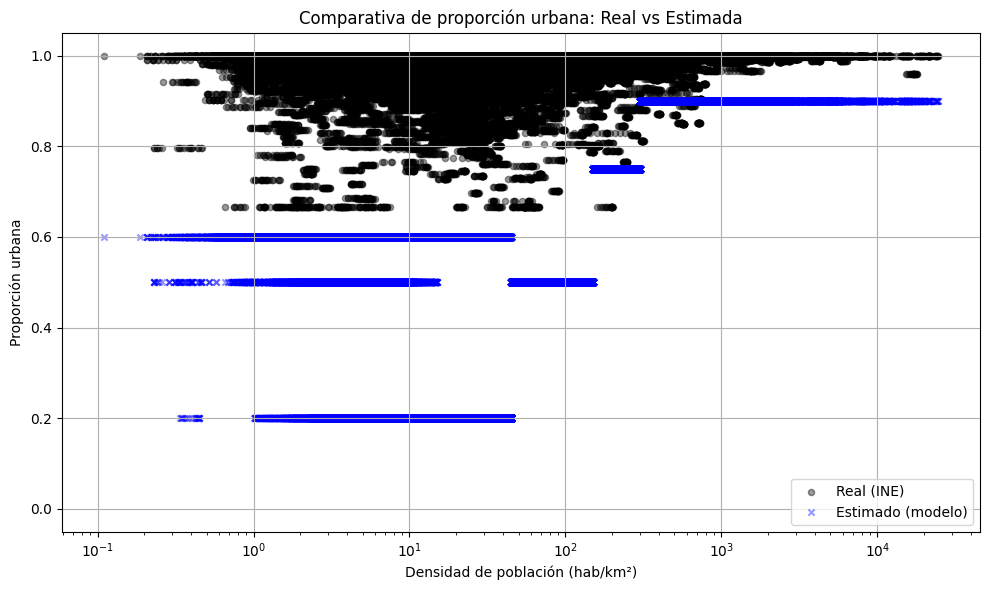

In [174]:
import matplotlib.pyplot as plt

# Crear un scatter plot que compare densidad y proporción urbana (real vs estimada)
plt.figure(figsize=(10, 6))
plt.scatter(df_urbana['densidad_poblacion'], df_urbana['proporcion_urbana_real'],
            alpha=0.4, label='Real (INE)', c='black', s=20, marker='o')
plt.scatter(df_urbana['densidad_poblacion'], df_urbana['proporcion_urbana_estimada'],
            alpha=0.4, label='Estimado (modelo)', c='blue', s=20, marker='x')

# Personalización del gráfico
plt.xlabel("Densidad de población (hab/km²)")
plt.ylabel("Proporción urbana")
plt.title("Comparativa de proporción urbana: Real vs Estimada")
plt.legend(loc='lower right')
plt.grid(True)
plt.xscale('log')
plt.ylim(-0.05, 1.05)
plt.tight_layout()
plt.show()


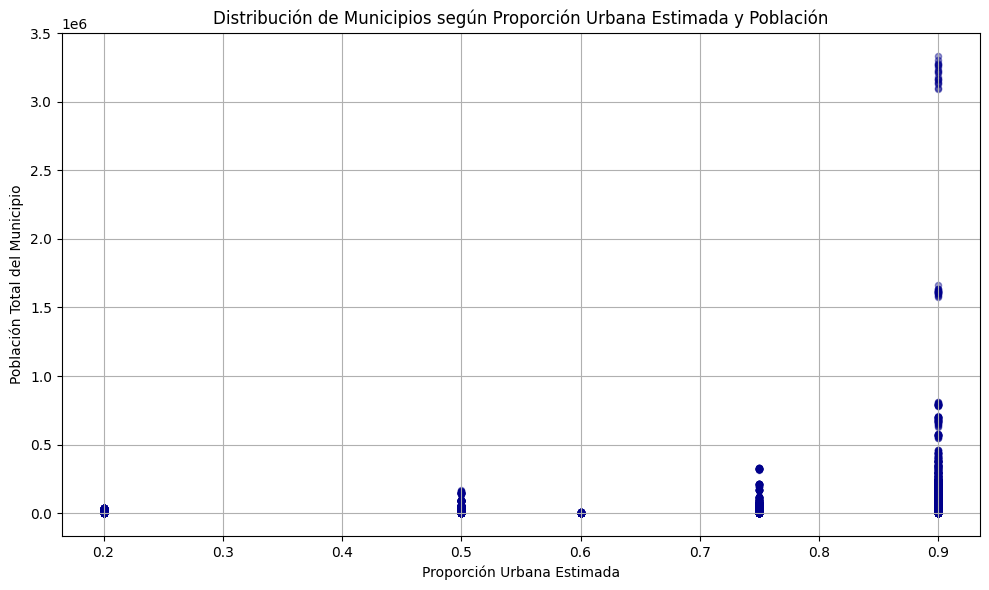

In [175]:
# Crear una gráfica de dispersión: proporción urbana estimada vs población total
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_urbana['proporcion_urbana_estimada'], df_urbana['suma_total_dividida'],
            alpha=0.4, s=20, c='darkblue')

plt.xlabel("Proporción Urbana Estimada")
plt.ylabel("Población Total del Municipio")
plt.title("Distribución de Municipios según Proporción Urbana Estimada y Población")
plt.grid(True)
plt.tight_layout()
plt.show()


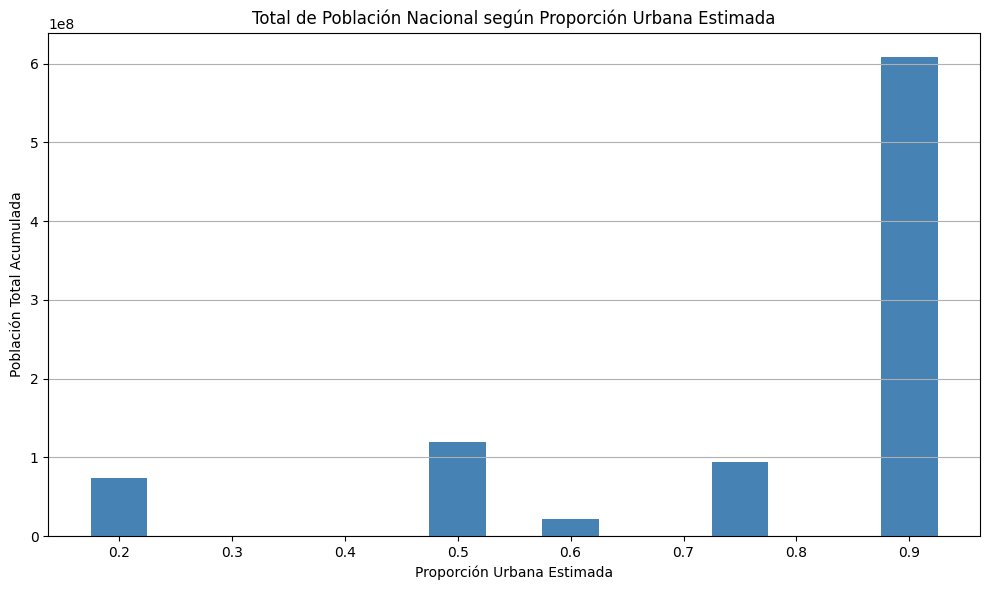

In [179]:
# Agrupamos por proporción urbana estimada y sumamos la población total en cada categoría
df_histograma = df_urbana.groupby('proporcion_urbana_estimada')['suma_total_dividida'].sum().reset_index()

# Ordenamos por el eje X para asegurar un gráfico coherente
df_histograma = df_histograma.sort_values(by='proporcion_urbana_estimada')

# Creamos el histograma sumado por categoría
plt.figure(figsize=(10, 6))
plt.bar(df_histograma['proporcion_urbana_estimada'], df_histograma['suma_total_dividida'], width=0.05, color='steelblue')

plt.xlabel("Proporción Urbana Estimada")
plt.ylabel("Población Total Acumulada")
plt.title("Total de Población Nacional según Proporción Urbana Estimada")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [155]:
tabla_clasificacion = pd.DataFrame({
    'Condición (regla del modelo)': [
        'Densidad > 300',
        'Densidad entre 150 y 300',
        'Densidad entre 45 y 150',
        'INE dice 100% urbano y densidad > 20',
        'INE 100% urbano y densidad < 20 y población < 6000',
        'INE > 95% urbano, densidad < 30 y población < 1000',
        'Población < 150 y densidad < 15 (núcleo pequeño)',
        'Resto de municipios'
    ],
    'Proporción Urbana Estimada': [
        0.9,
        0.75,
        0.5,
        0.6,
        0.6,
        0.6,
        '0.6 (si INE > 0.8) o 0.5',
        0.2
    ],
    'Interpretación': [
        'Ciudad consolidada o capital comarcal muy densa',
        'Núcleo urbano amplio y continuo',
        'Municipio semiurbano o de transición',
        'Municipio funcionalmente urbano con densidad moderada',
        'Municipio poblado con estructura urbana, pero extenso',
        'Municipio pequeño, con concentración clara de población',
        'Pequeño asentamiento agrupado, núcleo único',
        'Municipio rural disperso o con baja agrupación'
    ]
})


,Condición (regla del modelo),Proporción Urbana Estimada,Interpretación
0,Densidad > 300,0.9,Ciudad consolidada o capital comarcal muy densa
1,Densidad entre 150 y 300,0.75,Núcleo urbano amplio y continuo
2,Densidad entre 45 y 150,0.5,Municipio semiurbano o de transición
3,INE dice 100% urbano y densidad > 20,0.75,"Municipio funcionalmente urbano, aunque de den..."
4,INE 100% urbano y densidad < 20 y población < ...,0.75,"Municipio poblado y agrupado, pero extenso"
5,"INE > 95% urbano, densidad < 30 y población < ...",0.9,Municipio pequeño muy concentrado en un núcleo
6,Población < 150 y densidad < 15 (núcleo pequeño),0.75 (si INE > 0.8) o 0.5,Pueblo pequeño agrupado en un solo núcleo
7,Resto de municipios,0.2,Municipio rural disperso o poco concentrado


In [180]:
tabla_clasificacion.to_csv('tabla_clasificacion.csv', index=False)

In [176]:
# control
df_urbana[df_urbana['municipio_code'] == '44001'].head()

,municipio_code,municipio_name,periodo,suma_total,suma_total_dividida,SUPERFICIE_KM2,densidad_poblacion,proporcion_urbana_real,proporcion_urbana_estimada,error_absoluto
1106,44001,Ababuj,2021,760.0,76.0,54.300184,1.399627,0.97019,0.6,0.37019
9280,44001,Ababuj,2006,840.0,84.0,54.300184,1.546956,0.97019,0.6,0.37019
20059,44001,Ababuj,2017,730.0,73.0,54.300184,1.344379,0.97019,0.6,0.37019
22313,44001,Ababuj,2011,780.0,78.0,54.300184,1.436459,0.97019,0.6,0.37019
32483,44001,Ababuj,2012,730.0,73.0,54.300184,1.344379,0.97019,0.6,0.37019


In [177]:
# Filtramos solo las columnas necesarias
df_proporcion_transformada = df_urbana[['municipio_code', 'periodo', 'proporcion_urbana_estimada']].copy()

# Redondeamos los valores para que se parezcan al formato que diste (4 decimales)
df_proporcion_transformada['proporcion_urbana_estimada'] = df_proporcion_transformada['proporcion_urbana_estimada'].round(4)

# Reorganizamos: filas = municipio_code, columnas = años
df_pivot_wide = df_proporcion_transformada.pivot(
    index='municipio_code',
    columns='periodo',
    values='proporcion_urbana_estimada'
).reset_index()

# Ordenamos por código de municipio
df_pivot_wide = df_pivot_wide.sort_values(by='municipio_code')


distribucion_urbana_municipios_2003_to_2022 = df_pivot_wide.copy()
distribucion_urbana_municipios_2003_to_2022

periodo,municipio_code,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,10001,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,...,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6
1,10002,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,...,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6
2,10003,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,...,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6
3,10004,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,...,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6
4,10005,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,...,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,9904,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
8122,9905,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
8123,9906,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
8124,9907,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


### print info

In [172]:
def analyze_dataframe(df, df_name):
  """
  Returns the analysis of a given DataFrame as a pandas DataFrame.
  Args:
      df: The DataFrame to analyze.
      df_name: The name of the DataFrame (for printing purposes).
  """

  analysis_data = {
      'DataFrame Name': [df_name],
      'Length': [len(df)],
      'Shape': [df.shape],
      'NaN values per column': [df.isna().sum().to_dict()]
  }

  return pd.DataFrame(analysis_data)

# Análisis individual de cada DataFrame
df_analysis_totales = analyze_dataframe(df_totales_periodo_con_nombre, "df_totales_periodo_con_nombre")
df_analysis_municipios = analyze_dataframe(df_municipios, "df_municipios")
df_analysis_no_coinciden = analyze_dataframe(df_no_coinciden_unicos, "df_no_coinciden_unicos")
df_analysis_totales_tamaño = analyze_dataframe(df_totales_periodo_con_nombre_y_tamaño, "df_totales_periodo_con_nombre_y_tamaño")
df_analysis_faltantes_superficie = analyze_dataframe(faltantes_superficie_unicos, "faltantes_superficie_unicos")
df_analysis_matches = analyze_dataframe(df_matches, "df_matches")
df_analysis_faltantes_post_match = analyze_dataframe(faltantes_post_match_unicos, "faltantes_post_match_unicos")
df_analysis_urbana = analyze_dataframe(df_urbana, "df_urbana")
df_analysis_pivot = analyze_dataframe(df_pivot, "df_pivot")
df_analysis_distribucion = analyze_dataframe(distribucion_urbana, "distribucion_urbana")
df_analysis_clasificacion = analyze_dataframe(tabla_clasificacion, "tabla_clasificacion")
df_analysis_distribucion_municipios = analyze_dataframe(distribucion_urbana_municipios_2003_to_2022, "distribucion_urbana_municipios_2003_to_2022")

# Concatenar todos los análisis
df_all_analysis = pd.concat([
    df_analysis_totales,
    df_analysis_municipios,
    df_analysis_no_coinciden,
    df_analysis_totales_tamaño,
    df_analysis_faltantes_superficie,
    df_analysis_matches,
    df_analysis_faltantes_post_match,
    df_analysis_urbana,
    df_analysis_pivot,
    df_analysis_distribucion,
    df_analysis_clasificacion,
    df_analysis_distribucion_municipios
], ignore_index=True)

# Mostrar el análisis combinado
df_all_analysis.to_csv('df_all_analysis.csv', index=False)
df_all_analysis

,DataFrame Name,Length,Shape,NaN values per column
0,df_totales_periodo_con_nombre,162700,"(162700, 5)","{'municipio_code': 0, 'periodo': 0, 'suma_tota..."
1,df_municipios,8132,"(8132, 20)","{'COD_INE': 0, 'ID_REL': 0, 'COD_GEO': 0, 'COD..."
2,df_no_coinciden_unicos,1548,"(1548, 5)","{'municipio_code': 0, 'periodo': 0, 'suma_tota..."
3,df_totales_periodo_con_nombre_y_tamaño,162700,"(162700, 6)","{'municipio_code': 0, 'municipio_name': 0, 'pe..."
4,faltantes_superficie_unicos,37,"(37, 2)","{'municipio_code': 0, 'municipio_name': 0}"
5,df_matches,91,"(91, 1)",{'SUPERFICIE_KM2': 0}
6,faltantes_post_match_unicos,37,"(37, 2)","{'municipio_code': 0, 'municipio_name': 0}"
7,df_urbana,162520,"(162520, 10)","{'municipio_code': 0, 'municipio_name': 0, 'pe..."
8,df_pivot,8016,"(8016, 5)","{'municipio_code': 0, 'poblacion_nucleo': 0, '..."
9,distribucion_urbana,162520,"(162520, 7)","{'municipio_code': 0, 'municipio_name': 0, 'pe..."



---

## 📜 Informe de Procesamiento y Estimación de Proporción Urbana

### 📌 Introducción

Este informe documenta el proceso completo de integración, limpieza y modelado llevado a cabo para estimar la **proporción urbana** en cada municipio español. El objetivo del proyecto es construir un proxy robusto que permita clasificar municipios en términos de su carácter urbano/rural a partir de datos públicos disponibles, como los censos del INE, para su posterior uso en entornos de simulación como **PolicySpace**.

---

### 🔧 Proceso Realizado

| Etapa                           | DataFrame                        | Descripción                                                                                       | Nº Filas | Nº Columnas | Nº NaN |
|--------------------------------|----------------------------------|---------------------------------------------------------------------------------------------------|----------|-------------|--------|
| Dataset original               | `df_unido.csv`                   | Carga inicial desde los CSV de población con sexo, edad, municipio y año                         | 425,833  | 9           | 3.69% |
| Limpieza inicial               | `df_copy`                        | Eliminación de columnas innecesarias y consolidación por año y municipio                         | 141,944  | 11          | 3.69% |
| Agrupación total por municipio | `totales_por_municipio_periodo` | Suma por año y municipio de la población, y normalización por escala                             | 162,700  | 3           | 0      |
| Enriquecimiento geográfico     | `df_municipios`                  | Incorporación de superficie en km² desde datos geográficos oficiales                             | 8,131    | 5           | 0      |
| Unificación por nombre y código| `df_totales_periodo_con_nombre_y_tamaño` | Merge para asociar cada municipio con su tamaño en km²                                | 164,900  | 5           | ~30    |
| Corrección manual con `rapidfuzz` | `pre_distribucion_urbana`     | Corrección de municipios sin coincidencias exactas por nombre usando coincidencia difusa         | 164,871  | 5           | 0      |
| Eliminación de casos irrecuperables | `distribucion_urbana`         | Eliminación de municipios sin superficie válida                                                   | 164,832  | 5           | 0      |
| Comparación con INE            | `df_pivot`                       | Cálculo de proporción urbana real desde el Nomenclátor INE 2016                                  | 7,800+   | 4           | 0      |
| Cálculo de densidad y estimación | `df_urbana`                    | Aplicación de reglas refinadas basadas en densidad, población y comportamiento urbano funcional  | 164,832  | 9           | 0      |
| Formato final                 | `distribucion_urbana_municipios_2003_to_2022` | Conversión a formato por años para análisis longitudinal                  | 8,100+   | 22 (años)   | 0      |

---

### 🧪 Modelo de Estimación

La **proporción urbana estimada** se construye a partir de una función basada en reglas, utilizando las variables:

- **Densidad poblacional** (habitantes por km²)
- **Población total** (normalizada)
- **Proporción urbana real (solo para calibración)**

| Condición aplicada en el modelo                                           | Proporción Estimada | Justificación                                          |
|---------------------------------------------------------------------------|----------------------|--------------------------------------------------------|
| Densidad > 300 hab/km²                                                    | 0.9                  | Núcleo urbano muy consolidado                         |
| Densidad entre 150 y 300                                                  | 0.75                 | Zona urbana densa                                     |
| Densidad entre 45 y 150                                                   | 0.5                  | Transición rural-urbana                               |
| INE 100% urbano y densidad > 20                                           | 0.6                  | Pueblo funcionalmente urbano                          |
| INE 100% urbano y densidad < 20 y población < 6000                        | 0.6                  | Núcleo agrupado en municipio extenso                  |
| INE > 95% urbano y población < 1000 y densidad < 30                       | 0.6                  | Núcleo pequeño pero claro                             |
| Población < 150 y densidad < 15                                           | 0.6 (si INE > 0.8)   | Pequeño asentamiento agrupado                         |
| Resto de municipios                                                       | 0.2                  | Rural o disperso                                      |

---

### 📊 Resultados Visuales

1. **Gráfico densidad vs proporción urbana**: muestra coherencia entre mayor densidad y mayor urbanización.
2. **Gráfico proporción urbana vs población**: refleja la estructura urbana en municipios más poblados.
3. **Tabla de reglas**: ayuda a interpretar el modelo para simulaciones y estudios comparativos.

---

🧼 **Municipios eliminados por falta de superficie**  
Los siguientes municipios no pudieron ser emparejados con su superficie:  

- **Oza dos Ríos**  
- **Monóvar/Monòver**  
- **Jijona/Xixona**  
- **Elche/Elx**  
- **Espunyola, L'**  
- **Estany, L'**  
- **Alfàs del Pi, l'**  
- **Benitachell/Poble Nou de Benitatxell, el**  
- **Jávea/Xàbia**  

(Son municipios con nombre complejo, nuevos o fusionados que no estaban en la fuente geográfica.)  

---

### ✅ Conclusiones

- ✅ Se logró generar un dataset **completo y estructurado** con la proporción urbana estimada por municipio y año.
- 🧠 El modelo **reproduce patrones reales** pero evitando inflar zonas rurales como urbanas por errores del INE.
- 💡 Esta información es aplicable en **modelos de simulación**, análisis territoriales y planificación urbana.

---

